# Motion of a particle - Newtonian approach

> Renato Naville Watanabe, Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab)  
> Federal University of ABC, Brazil

In [1]:
%%javascript
MathJax.Extension["TeX/cancel"]={version:"2.4.0",ALLOWED:{color:1,mathcolor:1,background:1,mathbackground:1,padding:1,thickness:1}};MathJax.Hub.Register.StartupHook("TeX Jax Ready",function(){var c=MathJax.InputJax.TeX,a=MathJax.ElementJax.mml,b=MathJax.Extension["TeX/cancel"];b.setAttributes=function(h,e){if(e!==""){e=e.replace(/ /g,"").split(/,/);for(var g=0,d=e.length;g<d;g++){var f=e[g].split(/[:=]/);if(b.ALLOWED[f[0]]){if(f[1]==="true"){f[1]=true}if(f[1]==="false"){f[1]=false}h[f[0]]=f[1]}}}return h};c.Definitions.Add({macros:{cancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE],bcancel:["Cancel",a.NOTATION.DOWNDIAGONALSTRIKE],xcancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.DOWNDIAGONALSTRIKE],cancelto:"CancelTo"}},null,true);c.Parse.Augment({Cancel:function(e,g){var d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:g},d);this.Push(a.menclose(f).With(h))},CancelTo:function(e,g){var i=this.ParseArg(e),d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.UPDIAGONALARROW},d);i=a.mpadded(i).With({depth:"-.1em",height:"+.1em",voffset:".1em"});this.Push(a.msup(a.menclose(f).With(h),i))}});MathJax.Hub.Startup.signal.Post("TeX cancel Ready")});MathJax.Ajax.loadComplete("[MathJax]/extensions/TeX/cancel.js");

<IPython.core.display.Javascript object>

## Study of motion

In Mechanics we are interested in the study of motion (including deformation) and forces (and the relation between them) of anything in nature.  

As a good rule of thumb, we model the phenomenon of interest as simple as possible, with just enough complexity to understand the phenomenon. 

For example, we could model a person jumping as a particle (the center of gravity, with no size) moving in one direction (the vertical) if all we want is to estimate the jump height and relate that to the external forces to the human body. So, mechanics of a particle might be all we need.  
However, if the person jumps and performs a somersault, to understand this last part of the motion we have to model the human body as one of more objects which displaces and rotates in two or three dimensions. In this case, we would need what is called mechanics of rigid bodies.

If, besides the gross motions of the segments of the body, we are interested in understanding the deformation in the the human body segments and tissues, now we would have to describe the mechanical behavior of the body (e.g., how it deforms) under the action of forces. In this case we would have to include some constitutive laws describing the mechanical properties of the body.

## The development of the laws of motion of bodies  

"The theoretical development of the laws of motion of bodies is a problem of such interest and importance that it has engaged the attention of all the most eminent mathematicians since the invention of dynamics as a mathematical science by Galileo, and especially since the wonderful extension which was given to that science by Newton."

"Among the successors of those illustrious men, Lagrange has perhaps done more than any other analyst to give extent and harmony to such deductive researches, by showing that the most varied consequences respecting the motions of systems of bodies may be derived from one radical formula; the beauty of the methods so suiting the dignity of the results as to make of his great work a kind of scientific poem."  

&#8212; Hamilton, 1834 (apud Taylor, 2005).  

**Let's start with the study of the forces and motion in Mechanics looking at the motion of a particle using the Newtonian approach and later we will study the Lagrangian approach to these problems.**

## Newton's laws of motion

The Newton's laws of motion describe the relationship between the forces acting on a body and the resultant linear motion due to those forces:

- **First law**: An object will remain at rest or in uniform motion in a straight line unless an external force acts on the body.
- **Second law**: The acceleration of an object is directly proportional to the net force acting on the object and inversely proportional to the mass of the object: $\mathbf{F} = m\mathbf{a}.$
- **Third law**: Whenever an object exerts a force $\mathbf{F}_1$ (action) on a second object, this second object simultaneously exerts a force $\mathbf{F}_2$ on the first object with the same magnitude but opposite direction (reaction): $\mathbf{F}_2 = −\mathbf{F}_1.$

These three statements are astonishing in their simplicity and how much of knowledge they empower.   
Isaac Newton was born in 1943 and his works that resulted in these equations and other discoveries were mostly done in the years of 1666 and 1667, when he was only 24 years old! However, these works were only published in 1687, twenty years later.  

Here are these three laws in Newton's own words (from page 83 of Book I in the first American edition of the [*Philosophiæ Naturalis Principia Mathematica*](http://archive.org/details/newtonspmathema00newtrich):

> LAW I.    
> *Every body perseveres in its state of rest, or of uniform motion in a right line, unless it is compelled to change that state by forces impressed thereon.*   
> LAW II.    
> *The alteration of motion is ever proportional to the motive force impressed; and is made in the direction of the right line in which that force is impressed.*   
> LAW III.   
> *To every action there is always opposed an equal reaction: or the mutual actions of two bodies upon each other are always equal, and directed to contrary parts.*   

And Newton carefully defined mass, motion, and force in the first page of the book I (page 73 of the [*Principia*](http://archive.org/details/newtonspmathema00newtrich)):  

> DEFINITION I.   
> *The quantity of matter is the measure of the same, arising from its density and bulk conjunctly.*   
> ...It is this quantity that I mean hereafter everywhere under the name of body or mass.   
> DEFINITION II.   
> *The quantity of motion is the measure of the same, arising from the velocity and quantity of matter conjunctly.*    
> The motion of the whole is the sum of the motions of all the parts; and therefore in a body double in quantity, with equal velocity, the motion is double; with twice the velocity, it is quadruple.   
> DEFINITION IV.   
> *An impressed force is an action exerted upon a body, in order to change its state, either of rest, or of moving uniformly forward in a right line.*

## Steps to find the motion of a particle

1. Draw a free body diagram of the particle. Draw all the forces being applied to the particle.  
2. Write the expression of each force applied to the particle. For external forces (for example gravity and air friction) write the constitutive laws of the phenomena.  
3. Write the second Newton Law $\vec{\bf{F}} = m \vec{\bf{a}}$, where $\vec{\bf{F}}$ is the sum of all forces applied to the particle and $\vec{\bf{a}}$ is the particle acceleration.  
4. Separate the equation into the 3 cartesian components (or 2 components if the movement is bidimensional).  
5. Solve the differential equations
 1. If possible, solve the differential equations analytically.  
 2. If not possible to solve the differential equations analytically, separate each equation into 2 first order differential equations and use some numerical method (e.g. Euler, Runge-Kutta) to solve the first order differential equations with the aid of a computer.   
6. Use the solution to interpret the situation, or to find some error on your approach.  

**Later, we will study in details how to draw a free-body diagram.**  
Let's see now some examples on how to find the motion of a particle

### Example 1: Ball kicked into the air

#### Analytical solution

A football ball is kicked with an angle of 30 degrees with the ground (horizontal).  
The mass of the ball is 0.43 kg. The initial speed of the ball is 20 m/s and the initial height is 0 m. Consider the gravitational acceleration as 9.81 $m/s^2$.  
Find the motion of the ball. 

Solution:  
We know that:  
<span class="notranslate">
$$ x_0 = 0 m \\ y_0 = 0 m $$  
</span>
As the angle of the initial velocity of the ball with the ground is 30 degrees:  
<span class="notranslate">
$$ v_{x0} = 20 \cos(30^\circ) = 20\frac{\sqrt{3}}{2} = 10\sqrt{3} m/s \\
v_{y0} = 20 \sin(30^\circ) = 20 \frac{1}{2} = 10 m/s $$  
</span>
The free-body diagram of the ball is depicted below:
   
<figure><center><img src="../images/ballGrav.png" alt="free-body diagram of the ball" width="500"/><figcaption><i>Figure. Free-body diagram of a ball under the influence of gravity.</i></figcaption></center></figure>

The only force acting on the ball is the gravitational force:
<span class="notranslate">
$$ \vec{\bf{F}}_g = -mg \; \hat{\bf{j}} $$ 
</span>
So, we apply the Newton's second law:
<span class="notranslate">
$$ \vec{\bf{F}}_g = m \frac{d^2\vec{\bf{r}}}{dt^2} \quad \rightarrow \quad - mg \; \hat{\bf{j}} = m \frac{d^2\vec{\bf{r}}}{dt^2} \quad \rightarrow \quad - g \; \hat{\bf{j}} = \frac{d^2\vec{\bf{r}}}{dt^2} $$
</span>
Now, we can separate the equation in two components (x and y):
<span class="notranslate">
$$ 0 = \frac{d^2x}{dt^2} $$
</span>
and
<span class="notranslate">
$$ -g = \frac{d^2y}{dt^2} $$
</span>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook', font_scale=1.2)

In [3]:
m   = 0.43           # [kg]
x0  = 0              # [m]
y0  = 0              # [m]
vx0 = 10*np.sqrt(3)  # [m/s]
vy0 = 10             # [m/s]
g   = 9.81           # [m/s^2]

These equations can be easily solved  by integrating both sides of each equation:
<span class="notranslate">
$$ 0 = \frac{d^2x}{dt^2} \quad \rightarrow v_{x0} = \frac{dx}{dt} \quad \rightarrow \quad v_{x0}t + x_{0} = x(t) $$
</span>
and
<span class="notranslate">
$$ -g = \frac{d^2y}{dt^2} \quad \rightarrow - gt + v_{y0} = \frac{dy}{dt} \quad \rightarrow \quad -\frac{g}{2}t^2 +v_{y0}t + y_{0} = y(t) $$
</span>
So the trajectory of the ball along time is:
<span class="notranslate">
$$ x(t) = v_{x0}t $$
</span>
and 
<span class="notranslate">
$$ y(t) =  -\frac{g}{2} t^2 + v_{y0}t $$
</span>
or 
<span class="notranslate">
$$ \vec{\bf{r}}(t) =  v_{x0}t \; \hat{\bf{i}} + \left(-\frac{g}{2} t^2 + v_{y0}t \right) \; \hat{\bf{j}} $$
</span>

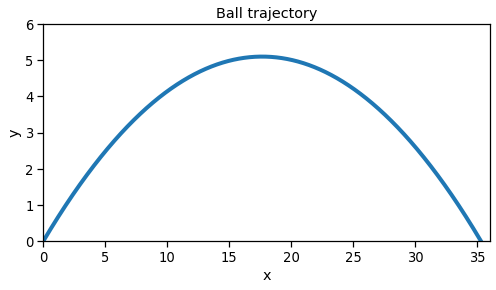

In [4]:
dt = 0.001  # [s]
t  = np.arange(0, 2.05, dt)
x1a = vx0*t
y1a = -g/2*t**2 + vy0*t
plt.figure(figsize=(8, 4))
plt.plot(x1a, y1a, lw=4)
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Numerical solution

We can solve this problem numerically and compare both solutions.

We start from the differential equations of each coordinate, and then break them into two first-order differential equations:
<span class="notranslate">
$$ 0 = \frac{d^2x}{dt^2} $$
</span>
and
<span class="notranslate">
$$ - g = \frac{d^2y}{dt^2} $$
</span>
The first equation can be broken as:
<span class="notranslate">
$$ \frac{dv_x}{dt} = 0 $$
</span>
<span class="notranslate">
$$ \frac{dx}{dt} = v_x(t) $$
</span>
And the second equation can be broken as:
<span class="notranslate">
$$ \frac{dv_y}{dt} = -g $$
</span>
<span class="notranslate">
$$ \frac{dy}{dt} = v_y(t) $$
</span>
You can use any numerical integration method you want (Euler, Runge-Kutta, etc), but here we will use the Euler method. Let's see the solution for the $x(t)$ variable.

The derivative of $x(t)$ is given by:
<span class="notranslate">
$$ \frac{dx}{dt} = \lim\limits_{\Delta t \rightarrow 0} \frac{x(t+\Delta t) - x(t)}{\Delta t} $$
</span>
Whcih can be approximated by: 
<span class="notranslate">
$$ \frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t} \quad \rightarrow \quad x(t+\Delta t) \approx x(t) + \Delta t \frac{dx}{dt} $$
</span>
So, with the initial conditions of all the variables, we can apply the equation above to find the values of the variables along time (for a revision of Ordinary Differential Equations, see the notebook [Ordinary Differential Equation](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/OrdinaryDifferentialEquation.ipynb)).  
In the cell below, we apply the Euler method for the four first-order differential equations.

In [5]:
x  = x0
y  = y0
vx = vx0
vy = vy0
r  = np.array([x, y])
while y >= 0:
    dxdt = vx
    x = x + dt * dxdt
    dydt = vy
    y = y + dt * dydt
    dvxdt = 0
    vx = vx + dt * dvxdt
    dvydt = -g
    vy = vy + dt * dvydt
    r = np.vstack((r, np.array([x,y])))

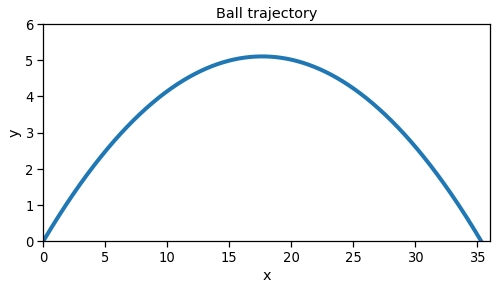

In [6]:
plt.figure(figsize=(8, 4))
x1n = r[:, 0]
y1n = r[:, 1]
plt.plot(x1n, y1n, lw=4)
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Example 2: Ball kicked into the air considering the air drag

Now, besides the gravity, we consider the drag due to the air resistance ($b$ = 0.006 Ns/m). First we will consider the drag force  proportional to the speed and opposite direction to the velocity vector.
       
<figure><center><img src="../images/ballGravLinearRes.png" alt="free-body diagram of the ball" width="500"/><figcaption><i>Figure. Free-body diagram of a ball under the influence of gravity and drag.</i></figcaption></center></figure>

So the forces being applied on the ball are:
<span class="notranslate">
$$ \vec{\bf{F}} = -mg \; \hat{\bf{j}} - b\vec{\bf{v}} = -mg \; \hat{\bf{j}} - b\frac{d\vec{\bf{r}}}{dt} = -mg \;  \hat{\bf{j}} - b\left(\frac{dx}{dt} \; \hat{\bf{i}}+\frac{dy}{dt} \; \hat{\bf{j}}\right) = - b\frac{dx}{dt} \; \hat{\bf{i}} - \left(mg + b\frac{dy}{dt}\right) \; \hat{\bf{j}} $$
</span>
Writing down the Newton's second law:
<span class="notranslate">
$$ \vec{\bf{F}} = m \frac{d^2\vec{\bf{r}}}{dt^2} \quad \rightarrow \quad - b\frac{dx}{dt} \; \hat{\bf{i}} - \left(mg + b\frac{dy}{dt}\right) \; \hat{\bf{j}} = m\left(\frac{d^2x}{dt^2} \; \hat{\bf{i}}+\frac{d^2y}{dt^2} \; \hat{\bf{j}}\right) $$
</span>
Now, we can separate into one equation for each coordinate:
<span class="notranslate">
$$ - b\frac{dx}{dt} = m\frac{d^2x}{dt^2} \quad \rightarrow \quad \frac{d^2x}{dt^2} = -\frac{b}{m} \frac{dx}{dt} $$
</span>
<span class="notranslate">
$$ -mg - b\frac{dy}{dt} = m\frac{d^2y}{dt^2} \quad \rightarrow \quad \frac{d^2y}{dt^2} = -\frac{b}{m}\frac{dy}{dt} - g $$ 
</span>
We can solve these equations analytically, for example, by using Laplace Transform or classical methods to solve linear differential equations.

#### Analytical solution

The solution of a linear differential equation can be found by finding the natural (or homogeneous) solution and the forced (or non-homogeneous) solution and then adding both solutions.

First, we solve the first differential equation ($x$ coordinate). The characteristic polynomial of the equation is:
<span class="notranslate">
$$ \lambda^2 + \frac{b}{m}\lambda = 0 $$ 
</span>
The roots of this equation are $\lambda = 0$ and $\lambda = -\frac{b}{m}$, and consequently, its natural modes are:
<span class="notranslate">
$$ x_{n_1}(t) = Ae^{0t} = A \\
x_{n_2}(t) = B e^{-\frac{b}{m}t} $$ 
</span>
As there is no external forces in the $x$ direction, there is no forced solution. So, the motion of the ball in the $x$ coordinate is:
<span class="notranslate">
$$ x(t) = A + Be^{-\frac{b}{m}t} $$
</span>
To find the values of the $A$ and $B$ constants, we must use the initial conditions $x(0)$ and $v_x(0)$.
<span class="notranslate">
$$ x(0) = 0 = A + B $$
</span>
<span class="notranslate">
$$ v_x(0) = v_{x0} = \frac{dx(0)}{dt} = -\frac{Bb}{m}e^{-\frac{b}{m}0} \quad \rightarrow \quad B = -\frac{v_{x0}m}{b} \quad \rightarrow \quad A = \frac{v_{x0}m}{b} $$
</span>
So:
<span class="notranslate">
$$ x(t) = \frac{v_{x0}m}{b} - \frac{v_{x0}m}{b}e^{-\frac{b}{m}t} = \frac{v_{x0}m}{b}\left(1-e^{-\frac{b}{m}t} \right) $$
</span>

Now, we solve the differential equation for the $y$ coordinate.  
First, we find the natural solution, which comprises the solution from the equation without the gravitational force (the force indepedent of y(t) and its derivatives), in this case:
<span class="notranslate">
$$ \frac{d^2y}{dt^2} = -\frac{b}{m}\frac{dy}{dt} $$
</span>
The solution of this equation is the same from the $x$ coordinate:
<span class="notranslate">
$$ y_n(t) = A + Be^{-\frac{b}{m}t} $$
</span>
The forced solution (including the gravitational force, which is constant) happens when every derivative, with the exception of the derivative with the lowest order (in this case order 1 but it could be order 0, i.e. no derivative) goes to zero. 
<span class="notranslate">
$$ \cancelto{0}{\frac{d^2y}{dt^2}} = -\frac{b}{m}\frac{dy_f}{dt} - g \quad \rightarrow \quad \frac{dy_f}{dt} = -\frac{mg}{b} \quad \rightarrow \quad y_f(t) = -\frac{mg}{b}t $$
</span>

The complete solution of the motion of the ball in the $y$ coordinate is the sum of the natural and forced solutions:
<span class="notranslate">
$$ y(t) = A + Be^{-\frac{b}{m}t} - \frac{mg}{b}t $$
</span>
To find the values of the constants A and B, we must use the initial conditions $y(0)$ and $v_y(0)$.
<span class="notranslate">
$$ y(0) = 0 = A + B $$
</span>
<span class="notranslate">
$$ v_y(0) = v_{y0} = \frac{dy(0)}{dt} = - \frac{Bb}{m} - \frac{mg}{b} \\
B = -\frac{m^2g}{b^2} -\frac{v_{y0}m}{b} \\
A = +\frac{m^2g}{b^2} + \frac{v_{y0}m}{b} $$
</span>
So, the motion of the ball in the y coordinate is:
<span class="notranslate">
$$ y(t) = \left(\frac{m^2g}{b^2} + \frac{v_{y0}m}{b}\right) - \left(\frac{m^2g}{b^2} + \frac{v_{y0}m}{b}\right)e^{-\frac{b}{m}t} -\frac{mg}{b}t \\
y(t) = \left(\frac{m^2g}{b^2} + \frac{v_{y0}m}{b}\right)\left(1 - e^{-\frac{b}{m}t}\right) - \frac{mg}{b}t $$
</span>

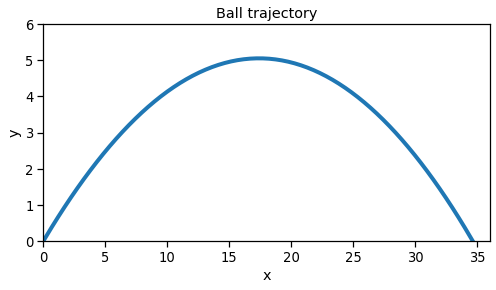

In [7]:
b = 0.006  # [Ns/m]
t = np.arange(0, 2.05, 0.01)
x2a = vx0*m/b*(1 - np.exp(-b/m*t))
y2a = (vy0*m/b + g*m**2/b**2) * (1 - np.exp(-b/m*t)) - g*m/b*t
plt.figure(figsize=(8, 4))
plt.plot(x2a, y2a, lw=4)
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Numerical solution

Now, we will solve the same situation using a numerical method (Euler method).  
We start from the equations previously found for each coordinate:
<span class="notranslate">
$$ \frac{d^2x}{dt^2} = -\frac{b}{m} \frac{dx}{dt} $$
</span>
<span class="notranslate">
$$ \frac{d^2y}{dt^2} = -\frac{b}{m}\frac{dy}{dt} - g $$
</span>
We can separate each equation into two first order equations and apply the Euler method:
<span class="notranslate">
$$ \frac{dv_x}{dt} = -\frac{b}{m} v_x $$
</span>
<span class="notranslate">
$$ \frac{dx}{dt} = v_x $$
</span>
<span class="notranslate">
$$ \frac{dv_y}{dt} = -\frac{b}{m}v_y - g $$
</span>
<span class="notranslate">
$$ \frac{dy}{dt} = v_y $$
</span>

In [8]:
x  = x0
y  = y0
vx = vx0
vy = vy0
r  = np.array([x, y])
while y >= 0:
    dxdt = vx
    x = x + dt * dxdt
    dydt = vy
    y = y + dt * dydt
    dvxdt = -b/m*vx
    vx = vx + dt * dvxdt
    dvydt = -g - b/m*vy
    vy = vy + dt * dvydt
    r = np.vstack((r, np.array([x, y])))

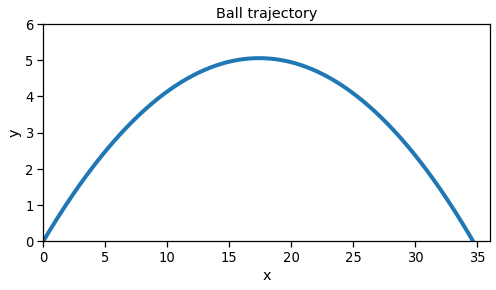

In [9]:
plt.figure(figsize=(8, 4))
x2n = r[:, 0]
y2n = r[:, 1]
plt.plot(x2n, y2n, lw=4)
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Example 3: Ball kicked into the air considering the air drag proportional to square of speed

Now, we will consider the drag force due to the air resistance proportional to the square of speed and still in the opposite direction of the velocity vector. 
           
<figure><center><img src="../images/ballGravSquareRes.png" alt="free-body diagram of the ball" width="500"/><figcaption><i>Figure. Free-body diagram of a ball under the influence of gravity and drag proportional to the square of speed.</i></figcaption></center></figure>

So the forces being applied on the ball are (for a revision of Time-varying frames and the meaning of the $\hat{\bf{e_t}}$, see [Time-varying frames notebook](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/Time-varying%20frames.ipynb)):
<span class="notranslate">
$$ \vec{\bf{F}} = -mg \; \hat{\bf{j}} - bv^2\hat{\bf{e_t}} \\
\vec{\bf{F}} = -mg \; \hat{\bf{j}} - b (v_x^2+v_y^2) \frac{v_x \; \hat{\bf{i}} + v_y \; \hat{\bf{j}}}{\sqrt{v_x^2+v_y^2}} \\
\vec{\bf{F}} = -mg \; \hat{\bf{j}} - b \sqrt{v_x^2+v_y^2} \,(v_x \; \hat{\bf{i}}+v_y \; \hat{\bf{j}}) \\
\vec{\bf{F}} = -mg \; \hat{\bf{j}} - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\left(\frac{dx}{dt} \hat{\bf{i}} + \frac{dy}{dt} \; \hat{\bf{j}}\right) $$
</span>
Writing down the Newton's second law:
<span class="notranslate">
$$ \vec{\bf{F}} = m \frac{d^2\vec{\bf{r}}}{dt^2} \\
-mg \; \hat{\bf{j}} - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\left(\frac{dx}{dt} \hat{\bf{i}}+\frac{dy}{dt}\hat{\bf{j}}\right) = m\left(\frac{d^2x}{dt^2}\hat{\bf{i}}+\frac{d^2y}{dt^2}\hat{\bf{j}}\right) $$
</span>
Now, we can separate into one equation for each coordinate:
<span class="notranslate">
$$ - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dx}{dt} = m\frac{d^2x}{dt^2} \quad \rightarrow \\
\frac{d^2x}{dt^2} = - \frac{b}{m} \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dx}{dt} $$
</span>
<span class="notranslate">
$$ -mg - b \sqrt{\left(\frac{dx}{dt} \right)^2+\left(\frac{dy}{dt} \right)^2} \,\frac{dy}{dt} = m\frac{d^2y}{dt^2} \quad \rightarrow \\
\frac{d^2y}{dt^2} = - \frac{b}{m} \sqrt{\left(\frac{dx}{dt} \right)^2 + \left(\frac{dy}{dt} \right)^2} \,\frac{dy}{dt} -g $$
</span>
These equations are very difficult to solve analytically, but they can be easily  solved by using numerical methods. Below we  will use the same numerical method (Euler method) to solve these equations.  
For that, again we must break each equation into two first-order differential equations:
<span class="notranslate">
$$ \frac{dv_x}{dt} = - \frac{b}{m} \sqrt{v_x^2+v_y^2} \,v_x $$
</span>
<span class="notranslate">
$$ \frac{dx}{dt} = v_x $$
</span>
<span class="notranslate">
$$ \frac{dv_y}{dt} = - \frac{b}{m} \sqrt{v_x^2+v_y^2} \,v_y -g $$
</span>
<span class="notranslate">
$$ \frac{dy}{dt} = v_y $$
</span>
Now, we can apply the Euler method to find a solution. 

In [10]:
x  = x0
y  = y0
vx = vx0
vy = vy0
r  = np.array([x, y])
while y >= 0:
    dxdt = vx
    x = x + dt * dxdt
    dydt = vy
    y = y + dt * dydt
    dvxdt = -b/m * np.sqrt(vx**2 + vy**2)*vx
    vx = vx + dt * dvxdt
    dvydt = -b/m * np.sqrt(vx**2 + vy**2)*vy - g
    vy = vy + dt * dvydt
    r = np.vstack((r, np.array([x, y])))

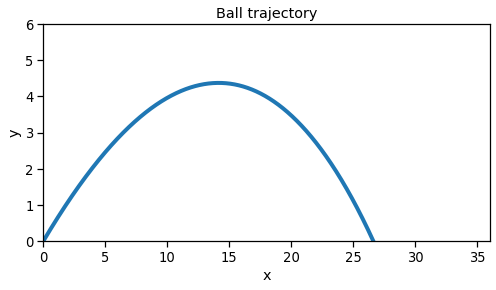

In [11]:
plt.figure(figsize=(8, 4))
x3n = r[:, 0]
y3n = r[:, 1]
plt.plot(x3n, y3n, lw=4)
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### All numerical solutions plotted together

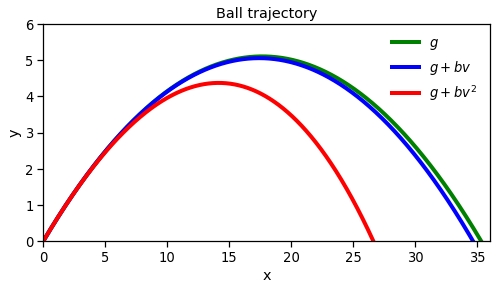

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(x1n, y1n, lw=4, c='g', label='$g$')
plt.plot(x2n, y2n, lw=4, c='b', label='$g+bv$')
plt.plot(x3n, y3n, lw=4, c='r', label='$g+bv^2$')
plt.xlim(0, 36)
plt.ylim(0, 6)
plt.title('Ball trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', frameon=False)
plt.show()

## Problems

1. Solve exercises 11.1.16, 11.1.19, 11.1.24, 11.1.29, 11.1.30, 11.1.31(a, b, d) and 11.1.32 from Ruina and Pratap's book.  

## References

- Ruina A, Rudra P (2013) [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press.  
- Taylor JR (2005) [Classical Mechanics](https://books.google.com.br/books?id=P1kCtNr-pJsC). University Science Books.